In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, top_k_accuracy_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss

In [2]:
def column_adjustor(dataset_column):
    codes, uniques = pd.factorize(dataset_column)
    return pd.Series(codes, index=dataset_column.index), uniques.tolist()

In [3]:
labels_with_few_samples = ['web_attack', 'exploit_source']

In [4]:
all_accuracy_scores = {}
all_confusion_matrices = {}

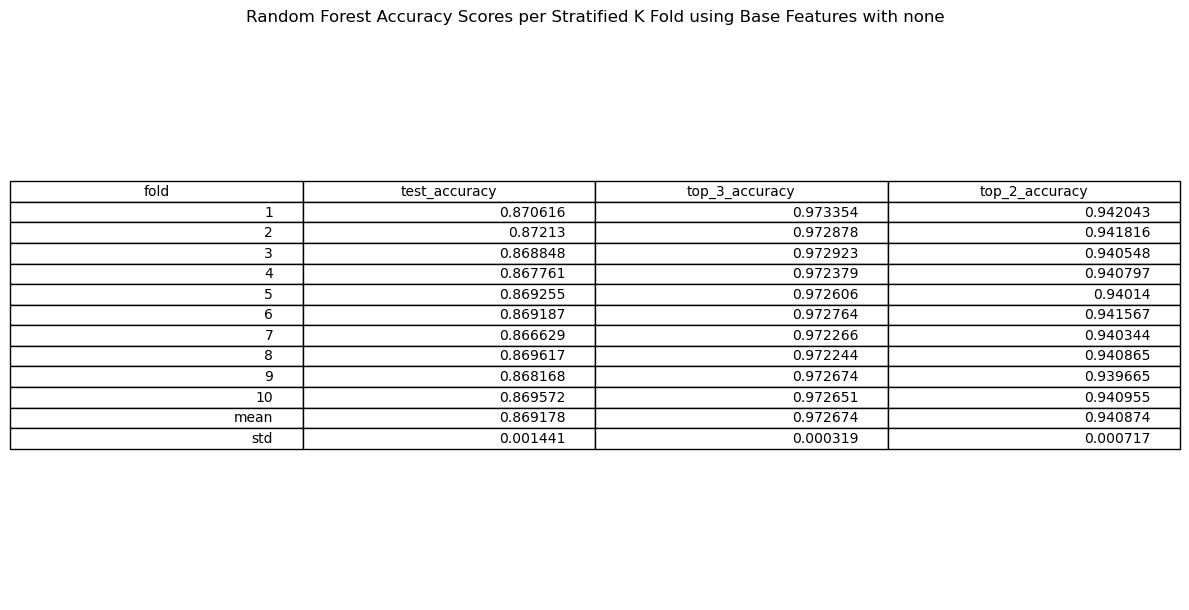

In [9]:
FEATURE_GROUP = "base_features"
INPUT_FILE = f"{FEATURE_GROUP}.csv"
df = pd.read_csv(INPUT_FILE)
df = df[~(df['label'].isin(labels_with_few_samples))].reset_index(drop=True)

df['label'], _ = column_adjustor(df['label'])
df['tld'], _ = column_adjustor(df['tld'])

for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

y = df['label'].astype(int)
X = df.drop(columns=['url', 'label'])
X = X.fillna(-1)

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_features=None)

scoring_metrics = {'none': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'smote': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'adasyn': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []},
                   'boderline_smote': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'tomek_links': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'nearmiss': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}
                  }
# X_tests = []
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scoring_metrics['none']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # all_confusion_matrices['none'].append(confusion_matrix(y_test, y_pred))
    y_pred_proba = rf.predict_proba(X_test)
    scoring_metrics['none']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    scoring_metrics['none']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))

    # smote = SMOTE(n_jobs=-1, random_state=42)
    # X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    # rf.fit(X_train_smote, y_train_smote)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['smote']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['smote']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['smote']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))

    # adasyn = ADASYN(n_jobs=-1, random_state=42)
    # X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
    # rf.fit(X_train_adasyn, y_train_adasyn)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['adasyn']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['adasyn']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['adasyn']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 

    # boderline_smote = BorderlineSMOTE(n_jobs=-1, random_state=42)
    # X_train_boderline_smote, y_train_boderline_smote = boderline_smote.fit_resample(X_train, y_train)
    # rf.fit(X_train_boderline_smote, y_train_boderline_smote)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['boderline_smote']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['boderline_smote']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['boderline_smote']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))   

    # tomek_links = TomekLinks(n_jobs=-1, random_state=42)
    # X_train_tomek_links, y_train_tomek_links = tomek_links.fit_resample(X_train, y_train)
    # rf.fit(X_train_tomek_links, y_train_tomek_links)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['tomek_links']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['tomek_links']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['tomek_links']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 

    # nearmiss = NearMiss(n_jobs=-1, random_state=42)
    # X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)
    # rf.fit(X_train_nearmiss, y_train_nearmiss)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['nearmiss']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['nearmiss']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['nearmiss']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 
    # X_tests.append(X_test)

scores_dfs = {}
scores_dfs['none'] = pd.DataFrame(scoring_metrics['none'])
# scores_dfs['smote'] = pd.DataFrame(scoring_metrics['smote'])
# scores_dfs['adasyn'] = pd.DataFrame(scoring_metrics['adasyn'])
# scores_dfs['borderline_smote'] = pd.DataFrame(scoring_metrics['borderline_smote'])
# scores_dfs['tomek_links'] = pd.DataFrame(scoring_metrics['tomek_links'])
# scores_dfs['nearmiss'] = pd.DataFrame(scoring_metrics['nearmiss'])

for k in scores_dfs.keys():
    mean = scores_dfs[k].mean()
    scores_dfs[k].loc['mean'] = mean
    std = scores_dfs[k].std()
    scores_dfs[k].loc['std'] = std
    scores_dfs[k]['fold'] = [str(i + 1) for i in range(n_splits)] + ["mean", "std"]

    scores = scores_dfs[k][['fold', 'test_accuracy', 'top_3_accuracy', 'top_2_accuracy']].round(6)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis("off")
    ax.axis("tight")
    table = ax.table(cellText = scores.values, colLabels = scores.columns, loc="center")
    plt.tight_layout()
    plt.title(f"Random Forest Accuracy Scores per Stratified K Fold using Base Features with {k}")
    plt.show()
    plt.close(fig)

    # all_accuracy_scores[k] = scores

## Oversampling

/opt/conda/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be remov

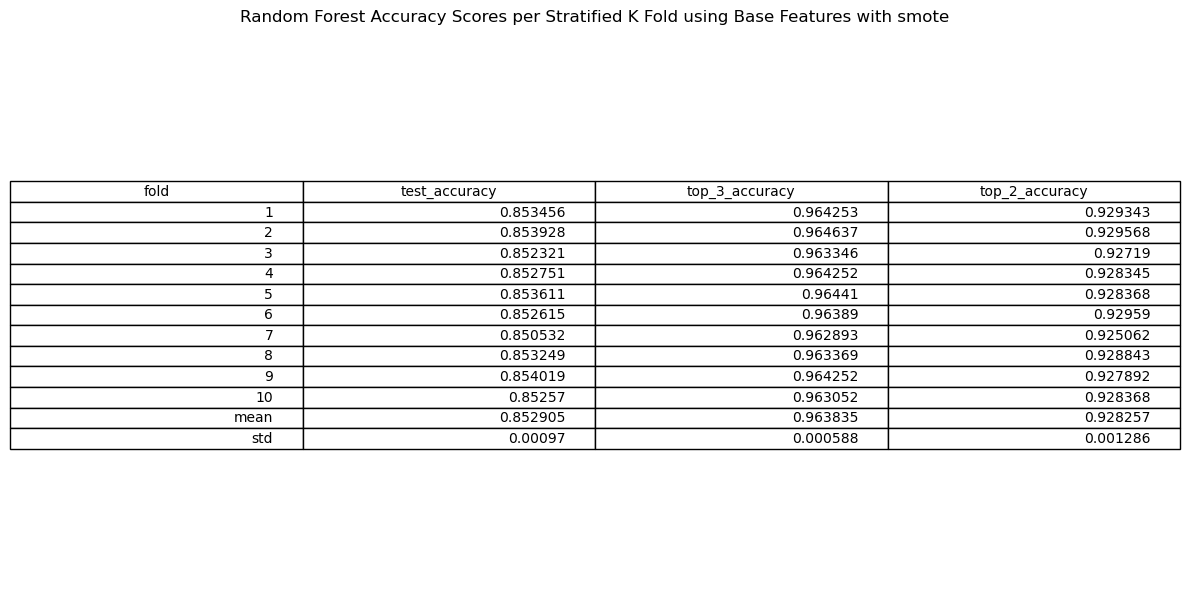

In [10]:
FEATURE_GROUP = "base_features"
INPUT_FILE = f"{FEATURE_GROUP}.csv"
df = pd.read_csv(INPUT_FILE)
df = df[~(df['label'].isin(labels_with_few_samples))].reset_index(drop=True)

df['label'], _ = column_adjustor(df['label'])
df['tld'], _ = column_adjustor(df['tld'])

for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

y = df['label'].astype(int)
X = df.drop(columns=['url', 'label'])
X = X.fillna(-1)

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_features=None)

scoring_metrics = {'none': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'smote': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'adasyn': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []},
                   'boderline_smote': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'tomek_links': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'nearmiss': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}
                  }
# X_tests = []
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # rf.fit(X_train, y_train)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['none']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # # all_confusion_matrices['none'].append(confusion_matrix(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['none']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['none']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))

    smote = SMOTE(n_jobs=-1, random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    rf.fit(X_train_smote, y_train_smote)
    y_pred = rf.predict(X_test)
    scoring_metrics['smote']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    y_pred_proba = rf.predict_proba(X_test)
    scoring_metrics['smote']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    scoring_metrics['smote']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))

    # adasyn = ADASYN(n_jobs=-1, random_state=42)
    # X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
    # rf.fit(X_train_adasyn, y_train_adasyn)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['adasyn']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['adasyn']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['adasyn']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 

    # boderline_smote = BorderlineSMOTE(n_jobs=-1, random_state=42)
    # X_train_boderline_smote, y_train_boderline_smote = boderline_smote.fit_resample(X_train, y_train)
    # rf.fit(X_train_boderline_smote, y_train_boderline_smote)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['boderline_smote']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['boderline_smote']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['boderline_smote']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))   

    # tomek_links = TomekLinks(n_jobs=-1, random_state=42)
    # X_train_tomek_links, y_train_tomek_links = tomek_links.fit_resample(X_train, y_train)
    # rf.fit(X_train_tomek_links, y_train_tomek_links)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['tomek_links']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['tomek_links']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['tomek_links']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 

    # nearmiss = NearMiss(n_jobs=-1, random_state=42)
    # X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)
    # rf.fit(X_train_nearmiss, y_train_nearmiss)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['nearmiss']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['nearmiss']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['nearmiss']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 
    # X_tests.append(X_test)

scores_dfs = {}
# scores_dfs['none'] = pd.DataFrame(scoring_metrics['none'])
scores_dfs['smote'] = pd.DataFrame(scoring_metrics['smote'])
# scores_dfs['adasyn'] = pd.DataFrame(scoring_metrics['adasyn'])
# scores_dfs['borderline_smote'] = pd.DataFrame(scoring_metrics['borderline_smote'])
# scores_dfs['tomek_links'] = pd.DataFrame(scoring_metrics['tomek_links'])
# scores_dfs['nearmiss'] = pd.DataFrame(scoring_metrics['nearmiss'])

for k in scores_dfs.keys():
    mean = scores_dfs[k].mean()
    scores_dfs[k].loc['mean'] = mean
    std = scores_dfs[k].std()
    scores_dfs[k].loc['std'] = std
    scores_dfs[k]['fold'] = [str(i + 1) for i in range(n_splits)] + ["mean", "std"]

    scores = scores_dfs[k][['fold', 'test_accuracy', 'top_3_accuracy', 'top_2_accuracy']].round(6)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis("off")
    ax.axis("tight")
    table = ax.table(cellText = scores.values, colLabels = scores.columns, loc="center")
    plt.tight_layout()
    plt.title(f"Random Forest Accuracy Scores per Stratified K Fold using Base Features with {k}")
    plt.show()
    plt.close(fig)

    # all_accuracy_scores[k] = scores

/opt/conda/lib/python3.10/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You 

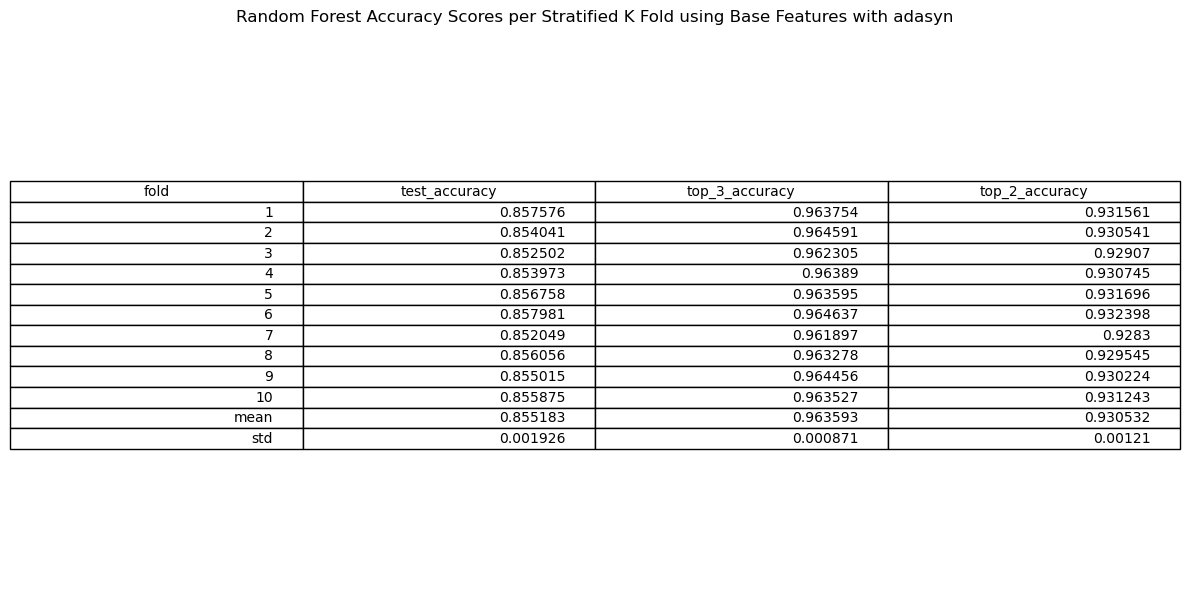

In [11]:
FEATURE_GROUP = "base_features"
INPUT_FILE = f"{FEATURE_GROUP}.csv"
df = pd.read_csv(INPUT_FILE)
df = df[~(df['label'].isin(labels_with_few_samples))].reset_index(drop=True)

df['label'], _ = column_adjustor(df['label'])
df['tld'], _ = column_adjustor(df['tld'])

for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

y = df['label'].astype(int)
X = df.drop(columns=['url', 'label'])
X = X.fillna(-1)

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_features=None)

scoring_metrics = {'none': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'smote': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'adasyn': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []},
                   'boderline_smote': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'tomek_links': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'nearmiss': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}
                  }
# X_tests = []
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # rf.fit(X_train, y_train)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['none']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # # all_confusion_matrices['none'].append(confusion_matrix(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['none']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['none']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))

    # smote = SMOTE(n_jobs=-1, random_state=42)
    # X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    # rf.fit(X_train_smote, y_train_smote)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['smote']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['smote']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['smote']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))

    adasyn = ADASYN(n_jobs=-1, random_state=42)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
    rf.fit(X_train_adasyn, y_train_adasyn)
    y_pred = rf.predict(X_test)
    scoring_metrics['adasyn']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    y_pred_proba = rf.predict_proba(X_test)
    scoring_metrics['adasyn']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    scoring_metrics['adasyn']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 

    # boderline_smote = BorderlineSMOTE(n_jobs=-1, random_state=42)
    # X_train_boderline_smote, y_train_boderline_smote = boderline_smote.fit_resample(X_train, y_train)
    # rf.fit(X_train_boderline_smote, y_train_boderline_smote)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['boderline_smote']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['boderline_smote']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['boderline_smote']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))   

    # tomek_links = TomekLinks(n_jobs=-1, random_state=42)
    # X_train_tomek_links, y_train_tomek_links = tomek_links.fit_resample(X_train, y_train)
    # rf.fit(X_train_tomek_links, y_train_tomek_links)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['tomek_links']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['tomek_links']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['tomek_links']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 

    # nearmiss = NearMiss(n_jobs=-1, random_state=42)
    # X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)
    # rf.fit(X_train_nearmiss, y_train_nearmiss)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['nearmiss']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['nearmiss']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['nearmiss']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 
    # X_tests.append(X_test)

scores_dfs = {}
# scores_dfs['none'] = pd.DataFrame(scoring_metrics['none'])
# scores_dfs['smote'] = pd.DataFrame(scoring_metrics['smote'])
scores_dfs['adasyn'] = pd.DataFrame(scoring_metrics['adasyn'])
# scores_dfs['borderline_smote'] = pd.DataFrame(scoring_metrics['borderline_smote'])
# scores_dfs['tomek_links'] = pd.DataFrame(scoring_metrics['tomek_links'])
# scores_dfs['nearmiss'] = pd.DataFrame(scoring_metrics['nearmiss'])

for k in scores_dfs.keys():
    mean = scores_dfs[k].mean()
    scores_dfs[k].loc['mean'] = mean
    std = scores_dfs[k].std()
    scores_dfs[k].loc['std'] = std
    scores_dfs[k]['fold'] = [str(i + 1) for i in range(n_splits)] + ["mean", "std"]

    scores = scores_dfs[k][['fold', 'test_accuracy', 'top_3_accuracy', 'top_2_accuracy']].round(6)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis("off")
    ax.axis("tight")
    table = ax.table(cellText = scores.values, colLabels = scores.columns, loc="center")
    plt.tight_layout()
    plt.title(f"Random Forest Accuracy Scores per Stratified K Fold using Base Features with {k}")
    plt.show()
    plt.close(fig)

    # all_accuracy_scores[k] = scores

/opt/conda/lib/python3.10/site-packages/imblearn/over_sampling/_smote/filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/imblearn/over_sampling/_smote/filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/imblearn/over_sampling/_smote/filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/imblearn/over_sampling/_smote/filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will 

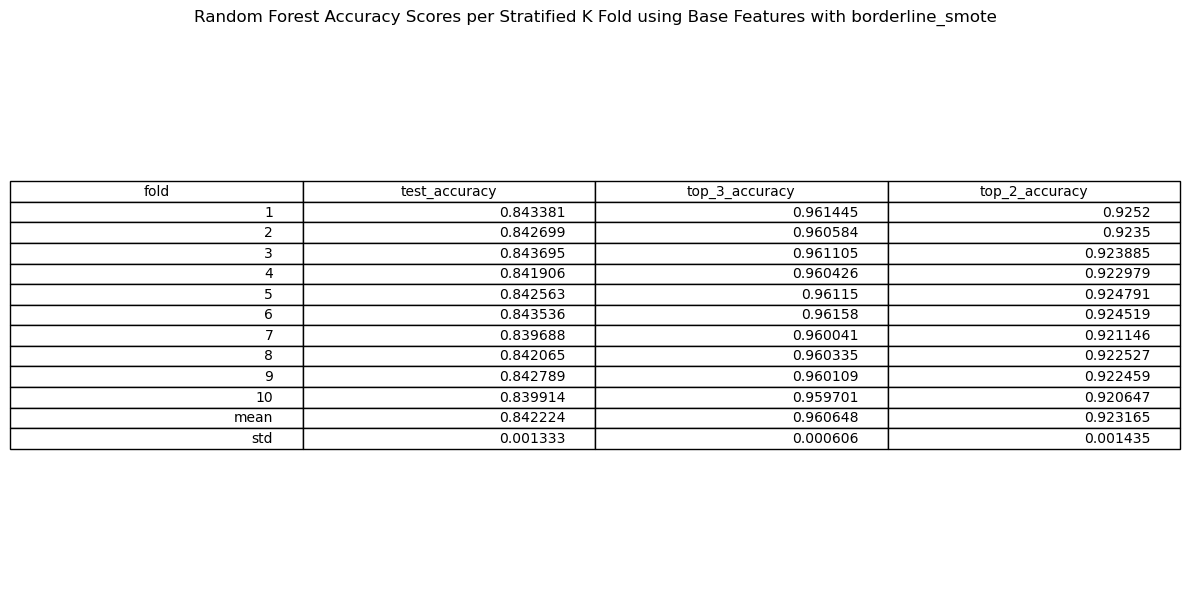

In [16]:
FEATURE_GROUP = "base_features"
INPUT_FILE = f"{FEATURE_GROUP}.csv"
df = pd.read_csv(INPUT_FILE)
df = df[~(df['label'].isin(labels_with_few_samples))].reset_index(drop=True)

df['label'], _ = column_adjustor(df['label'])
df['tld'], _ = column_adjustor(df['tld'])

for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

y = df['label'].astype(int)
X = df.drop(columns=['url', 'label'])
X = X.fillna(-1)

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_features=None)

scoring_metrics = {'none': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'smote': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'adasyn': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []},
                   'borderline_smote': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'tomek_links': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'nearmiss': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}
                  }
# X_tests = []
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # rf.fit(X_train, y_train)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['none']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # # all_confusion_matrices['none'].append(confusion_matrix(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['none']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['none']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))

    # smote = SMOTE(n_jobs=-1, random_state=42)
    # X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    # rf.fit(X_train_smote, y_train_smote)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['smote']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['smote']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['smote']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))

    # adasyn = ADASYN(n_jobs=-1, random_state=42)
    # X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
    # rf.fit(X_train_adasyn, y_train_adasyn)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['adasyn']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['adasyn']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['adasyn']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 

    boderline_smote = BorderlineSMOTE(n_jobs=-1, random_state=42)
    X_train_boderline_smote, y_train_boderline_smote = boderline_smote.fit_resample(X_train, y_train)
    rf.fit(X_train_boderline_smote, y_train_boderline_smote)
    y_pred = rf.predict(X_test)
    scoring_metrics['borderline_smote']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    y_pred_proba = rf.predict_proba(X_test)
    scoring_metrics['borderline_smote']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    scoring_metrics['borderline_smote']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))   

    # tomek_links = TomekLinks(n_jobs=-1, random_state=42)
    # X_train_tomek_links, y_train_tomek_links = tomek_links.fit_resample(X_train, y_train)
    # rf.fit(X_train_tomek_links, y_train_tomek_links)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['tomek_links']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['tomek_links']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['tomek_links']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 

    # nearmiss = NearMiss(n_jobs=-1, random_state=42)
    # X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)
    # rf.fit(X_train_nearmiss, y_train_nearmiss)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['nearmiss']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['nearmiss']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['nearmiss']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 
    # X_tests.append(X_test)

scores_dfs = {}
# scores_dfs['none'] = pd.DataFrame(scoring_metrics['none'])
# scores_dfs['smote'] = pd.DataFrame(scoring_metrics['smote'])
# scores_dfs['adasyn'] = pd.DataFrame(scoring_metrics['adasyn'])
scores_dfs['borderline_smote'] = pd.DataFrame(scoring_metrics['borderline_smote'])
# scores_dfs['tomek_links'] = pd.DataFrame(scoring_metrics['tomek_links'])
# scores_dfs['nearmiss'] = pd.DataFrame(scoring_metrics['nearmiss'])

for k in scores_dfs.keys():
    mean = scores_dfs[k].mean()
    scores_dfs[k].loc['mean'] = mean
    std = scores_dfs[k].std()
    scores_dfs[k].loc['std'] = std
    scores_dfs[k]['fold'] = [str(i + 1) for i in range(n_splits)] + ["mean", "std"]

    scores = scores_dfs[k][['fold', 'test_accuracy', 'top_3_accuracy', 'top_2_accuracy']].round(6)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis("off")
    ax.axis("tight")
    table = ax.table(cellText = scores.values, colLabels = scores.columns, loc="center")
    plt.tight_layout()
    plt.title(f"Random Forest Accuracy Scores per Stratified K Fold using Base Features with {k}")
    plt.show()
    plt.close(fig)

    # all_accuracy_scores[k] = scores

## Undersampling

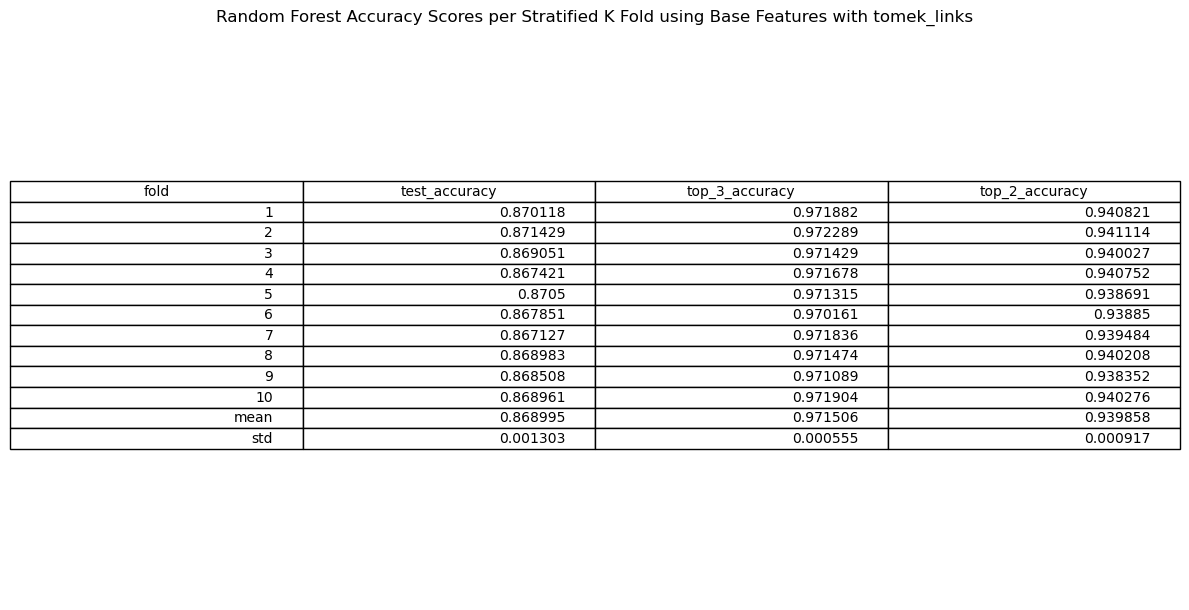

In [17]:
FEATURE_GROUP = "base_features"
INPUT_FILE = f"{FEATURE_GROUP}.csv"
df = pd.read_csv(INPUT_FILE)
df = df[~(df['label'].isin(labels_with_few_samples))].reset_index(drop=True)

df['label'], _ = column_adjustor(df['label'])
df['tld'], _ = column_adjustor(df['tld'])

for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

y = df['label'].astype(int)
X = df.drop(columns=['url', 'label'])
X = X.fillna(-1)

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_features=None)

scoring_metrics = {'none': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'smote': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'adasyn': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []},
                   'boderline_smote': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'tomek_links': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'nearmiss': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}
                  }
# X_tests = []
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # rf.fit(X_train, y_train)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['none']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # # all_confusion_matrices['none'].append(confusion_matrix(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['none']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['none']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))

    # smote = SMOTE(n_jobs=-1, random_state=42)
    # X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    # rf.fit(X_train_smote, y_train_smote)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['smote']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['smote']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['smote']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))

    # adasyn = ADASYN(n_jobs=-1, random_state=42)
    # X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
    # rf.fit(X_train_adasyn, y_train_adasyn)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['adasyn']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['adasyn']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['adasyn']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 

    # boderline_smote = BorderlineSMOTE(n_jobs=-1, random_state=42)
    # X_train_boderline_smote, y_train_boderline_smote = boderline_smote.fit_resample(X_train, y_train)
    # rf.fit(X_train_boderline_smote, y_train_boderline_smote)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['boderline_smote']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['boderline_smote']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['boderline_smote']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))   

    tomek_links = TomekLinks(n_jobs=-1)
    X_train_tomek_links, y_train_tomek_links = tomek_links.fit_resample(X_train, y_train)
    rf.fit(X_train_tomek_links, y_train_tomek_links)
    y_pred = rf.predict(X_test)
    scoring_metrics['tomek_links']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    y_pred_proba = rf.predict_proba(X_test)
    scoring_metrics['tomek_links']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    scoring_metrics['tomek_links']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 

    # nearmiss = NearMiss(n_jobs=-1, random_state=42)
    # X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)
    # rf.fit(X_train_nearmiss, y_train_nearmiss)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['nearmiss']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['nearmiss']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['nearmiss']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 
    # X_tests.append(X_test)

scores_dfs = {}
# scores_dfs['none'] = pd.DataFrame(scoring_metrics['none'])
# scores_dfs['smote'] = pd.DataFrame(scoring_metrics['smote'])
# scores_dfs['adasyn'] = pd.DataFrame(scoring_metrics['adasyn'])
# scores_dfs['borderline_smote'] = pd.DataFrame(scoring_metrics['borderline_smote'])
scores_dfs['tomek_links'] = pd.DataFrame(scoring_metrics['tomek_links'])
# scores_dfs['nearmiss'] = pd.DataFrame(scoring_metrics['nearmiss'])

for k in scores_dfs.keys():
    mean = scores_dfs[k].mean()
    scores_dfs[k].loc['mean'] = mean
    std = scores_dfs[k].std()
    scores_dfs[k].loc['std'] = std
    scores_dfs[k]['fold'] = [str(i + 1) for i in range(n_splits)] + ["mean", "std"]

    scores = scores_dfs[k][['fold', 'test_accuracy', 'top_3_accuracy', 'top_2_accuracy']].round(6)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis("off")
    ax.axis("tight")
    table = ax.table(cellText = scores.values, colLabels = scores.columns, loc="center")
    plt.tight_layout()
    plt.title(f"Random Forest Accuracy Scores per Stratified K Fold using Base Features with {k}")
    plt.show()
    plt.close(fig)

    # all_accuracy_scores[k] = scores

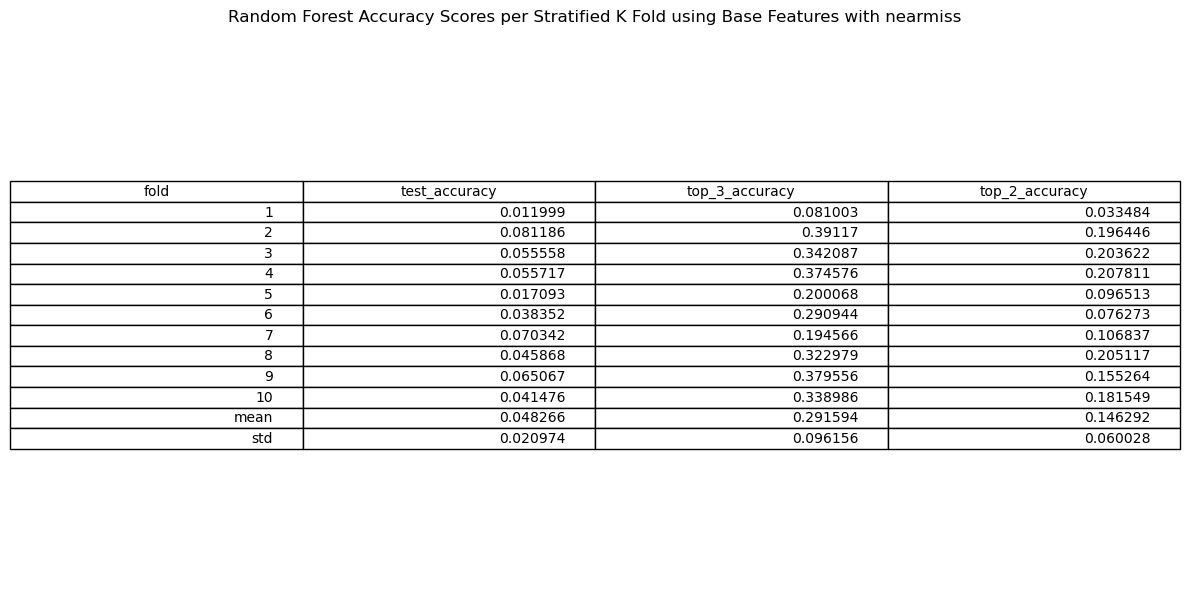

In [21]:
FEATURE_GROUP = "base_features"
INPUT_FILE = f"{FEATURE_GROUP}.csv"
df = pd.read_csv(INPUT_FILE)
df = df[~(df['label'].isin(labels_with_few_samples))].reset_index(drop=True)

df['label'], _ = column_adjustor(df['label'])
df['tld'], _ = column_adjustor(df['tld'])

for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

y = df['label'].astype(int)
X = df.drop(columns=['url', 'label'])
X = X.fillna(-1)

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_features=None)

scoring_metrics = {'none': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'smote': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'adasyn': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []},
                   'boderline_smote': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'tomek_links': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}, 
                   'nearmiss': {'test_accuracy': [], 'top_3_accuracy': [], 'top_2_accuracy': []}
                  }
# X_tests = []
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # rf.fit(X_train, y_train)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['none']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # # all_confusion_matrices['none'].append(confusion_matrix(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['none']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['none']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))

    # smote = SMOTE(n_jobs=-1, random_state=42)
    # X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    # rf.fit(X_train_smote, y_train_smote)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['smote']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['smote']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['smote']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))

    # adasyn = ADASYN(n_jobs=-1, random_state=42)
    # X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
    # rf.fit(X_train_adasyn, y_train_adasyn)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['adasyn']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['adasyn']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['adasyn']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 

    # boderline_smote = BorderlineSMOTE(n_jobs=-1, random_state=42)
    # X_train_boderline_smote, y_train_boderline_smote = boderline_smote.fit_resample(X_train, y_train)
    # rf.fit(X_train_boderline_smote, y_train_boderline_smote)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['boderline_smote']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['boderline_smote']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['boderline_smote']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2))   

    # tomek_links = TomekLinks(n_jobs=-1)
    # X_train_tomek_links, y_train_tomek_links = tomek_links.fit_resample(X_train, y_train)
    # rf.fit(X_train_tomek_links, y_train_tomek_links)
    # y_pred = rf.predict(X_test)
    # scoring_metrics['tomek_links']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    # y_pred_proba = rf.predict_proba(X_test)
    # scoring_metrics['tomek_links']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    # scoring_metrics['tomek_links']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 

    nearmiss = NearMiss(n_jobs=-1)
    X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)
    rf.fit(X_train_nearmiss, y_train_nearmiss)
    y_pred = rf.predict(X_test)
    scoring_metrics['nearmiss']['test_accuracy'].append(accuracy_score(y_test, y_pred))
    y_pred_proba = rf.predict_proba(X_test)
    scoring_metrics['nearmiss']['top_3_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=3))
    scoring_metrics['nearmiss']['top_2_accuracy'].append(top_k_accuracy_score(y_test, y_pred_proba, k=2)) 
    # X_tests.append(X_test)

scores_dfs = {}
# scores_dfs['none'] = pd.DataFrame(scoring_metrics['none'])
# scores_dfs['smote'] = pd.DataFrame(scoring_metrics['smote'])
# scores_dfs['adasyn'] = pd.DataFrame(scoring_metrics['adasyn'])
# scores_dfs['borderline_smote'] = pd.DataFrame(scoring_metrics['borderline_smote'])
# scores_dfs['tomek_links'] = pd.DataFrame(scoring_metrics['tomek_links'])
scores_dfs['nearmiss'] = pd.DataFrame(scoring_metrics['nearmiss'])

for k in scores_dfs.keys():
    mean = scores_dfs[k].mean()
    scores_dfs[k].loc['mean'] = mean
    std = scores_dfs[k].std()
    scores_dfs[k].loc['std'] = std
    scores_dfs[k]['fold'] = [str(i + 1) for i in range(n_splits)] + ["mean", "std"]

    scores = scores_dfs[k][['fold', 'test_accuracy', 'top_3_accuracy', 'top_2_accuracy']].round(6)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis("off")
    ax.axis("tight")
    table = ax.table(cellText = scores.values, colLabels = scores.columns, loc="center")
    plt.tight_layout()
    plt.title(f"Random Forest Accuracy Scores per Stratified K Fold using Base Features with {k}")
    plt.show()
    plt.close(fig)

    # all_accuracy_scores[k] = scores